# Decomposed_Learning_Results (CL* Algorithm)


In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [492]:
# don't run this if you use google colab 
df =  pd.read_csv('data/Results.csv',index_col=False)

## Clean data

In [493]:
def round_data(data):
  return round(data, 3)

In [494]:
df = df[(df["STATES"]<=3840) & (df["STATES"]>100) ]

In [495]:
df = df.dropna(axis=1, how='all')
df = df.dropna()
df

,FILE_NAME,STATES,INPUTS,LSTAR_MQ_SYM,LSTAR_MQ_RST,LSTAR_EQ_SYM,LSTAR_EQ_RST,LSTAR_TOTAL_SYM,LSTAR_TOTAL_RST,LSTAR_EQs,CLSTAR_MQ_SYM,CLSTAR_MQ_RST,CLSTAR_EQ_SYM,CLSTAR_EQ_RST,CLSTAR_TOTAL_SYM,CLSTAR_TOTAL_RST,CLSTAR_EQs,CLSTAR_COMPONENTS,CLSTAR_ROUNDS,CACHE
9,Real-Tests/data/Reals_With_4_Components2.txt,298,13,7732853,127321,76719,513,7809572,127834,4,10557077,125662,1510612,10083,12067689,135745,99,2,11,True
11,Real-Tests/data/Reals_With_4_Components4.txt,180,18,6671718,97545,76438,501,6748156,98046,2,3336330,43079,2795371,18610,6131701,61689,177,3,15,True
12,Real-Tests/data/Reals_With_5_Components1.txt,894,16,3573813,192659,75150,502,3648963,193161,2,10793711,140952,2571316,17124,13365027,158076,144,3,13,True
13,Real-Tests/data/Reals_With_5_Components2.txt,1248,19,16770435,468084,79968,532,16850403,468616,3,9206471,138978,4524659,30172,13731130,169150,239,3,19,True
14,Real-Tests/data/Reals_With_5_Components3.txt,112,16,192528,28688,74188,500,266716,29188,1,24313,1381,3692424,24595,3716737,25976,149,5,13,True
16,Real-Tests/data/Reals_With_6_Components1.txt,1248,25,17216250,944919,75307,503,17291557,945422,2,10392270,127108,6946225,46173,17338495,173281,357,6,21,True
18,Real-Tests/data/Reals_With_6_Components3.txt,384,17,9203882,165150,76323,516,9280205,165666,3,13279598,160352,3482485,23131,16762083,183483,179,4,15,True
20,Real-Tests/data/Reals_With_7_Components1.txt,2808,27,5913675,734859,73957,500,5987632,735359,1,1118142,15758,8663125,57680,9781267,73438,395,6,22,True
21,Real-Tests/data/Reals_With_7_Components2.txt,1152,23,16425875,356431,75121,504,16500996,356935,2,20335806,240652,5497912,36680,25833718,277332,303,5,19,True
22,Real-Tests/data/Reals_With_7_Components3.txt,1248,22,21942378,826896,75750,508,22018128,827404,3,13305768,161125,6564041,43668,19869809,204793,280,6,18,True


In [496]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

In [497]:
# @title Bins
bins = [100,1100,1300,2900]
labels = []

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [498]:
# Data Distribution
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   14
Min:     112
Max:     2880
mean:    1210.5714285714287
std:     857.1133767824072


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2303827582.py:3: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2303827582.py:4: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2303827582.py:6: FutureWarning: The provided callable <built-in function min> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current

In [499]:
# calculate the progress 

df['CLSTAR_TOTAL_RST_progress'] = (1 - (df['CLSTAR_TOTAL_RST'] / df['CLSTAR_TOTAL_RST']))*100
df['CLSTAR_TOTAL_SYM_progress'] = (1 - (df['CLSTAR_TOTAL_SYM'] / df['CLSTAR_TOTAL_SYM']))*100

df['CLSTAR_MQ_SYM_progress'] = (1 - (df['CLSTAR_MQ_SYM'] / df['CLSTAR_MQ_SYM']))*100
df['CLSTAR_MQ_RST_progress'] = (1 - (df['CLSTAR_MQ_RST'] / df['CLSTAR_MQ_RST']))*100
df['CLSTAR_EQ_SYM_progress'] = (1 - (df['CLSTAR_EQ_SYM'] / df['CLSTAR_EQ_SYM']))*100
df['CLSTAR_EQ_RST_progress'] = (1 - (df['CLSTAR_EQ_RST'] / df['CLSTAR_EQ_RST']))*100


In [500]:
# @title Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    lstar_resets_count = data.loc[:,  'CLSTAR_TOTAL_RST']
    CLSTAR_resets_count = data.loc[:, 'CLSTAR_TOTAL_RST']
    lstar_symbols_count = data.loc[:, 'CLSTAR_TOTAL_SYM']
    CLSTAR_symbols_count = data.loc[:,'CLSTAR_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(CLSTAR_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(CLSTAR_symbols_count,'norm'))

    print(shapiro(states_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(CLSTAR_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(CLSTAR_symbols_count))



100 - 1100
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=112, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=25976, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=25976, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3716737, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3716737, statistic_sign=-1)
ShapiroResult(statistic=0.8963831780672467, pvalue=0.09995612086299234)
ShapiroResult(statistic=0.9410391639815876, pvalue=0.4318025741427914)
ShapiroResult(statistic=0.9410391639815876, pvalue=0.4318025741427914)
ShapiroResult(statistic=0.9559949006272074, pvalue=0.6569660217221918)
ShapiroResult(statistic=0.9559949006272074, pvalue=0.6569660217221918)
1100 - 1300
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=112, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=25976, statistic_sign=-1)
KstestResult(statistic=1.0

In [501]:
# @title Cluster Items

grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_total_sym_median=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='median'),
    LSTAR_total_sym_mean=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='mean'),
    LSTAR_total_sym_std=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc="std"),
    LSTAR_total_reset_median=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='median'),
    LSTAR_total_reset_mean=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='mean'),
    LSTAR_total_reset_std=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc="std"),
    LSTAR_mq_sym_mean=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc='median'),
    LSTAR_mq_sym_std=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc="std"),
    LSTAR_mq_reset_mean=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc='median'),
    LSTAR_mq_reset_std=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc="std"),
    LSTAR_eq_sym_mean=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc='median'),
    LSTAR_eq_sym_std=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc="std"),
    LSTAR_eq_reset_mean=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc='median'),
    LSTAR_eq_reset_std=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc="std"),
    LSTAR_eqs=pd.NamedAgg(column='LSTAR_EQs', aggfunc='median'),

    CLSTAR_total_sym_median=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='mean'),
    CLSTAR_total_sym_mean=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='median'),
    CLSTAR_total_sym_std=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc="std"),
    CLSTAR_total_reset_median=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='median'),
    CLSTAR_total_reset_mean=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='mean'),
    CLSTAR_total_reset_std=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc="std"),
    CLSTAR_mq_sym_mean=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc='median'),
    CLSTAR_mq_sym_std=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc="std"),
    CLSTAR_mq_reset_mean=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc='median'),
    CLSTAR_mq_reset_std=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc="std"),
    CLSTAR_eq_sym_mean=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc='median'),
    CLSTAR_eq_sym_std=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc="std"),
    CLSTAR_eq_reset_mean=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc='median'),
    CLSTAR_eq_reset_std=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc="std"),
    CLSTAR_eqs=pd.NamedAgg(column='CLSTAR_EQs', aggfunc='median'),
    CLSTAR_components=pd.NamedAgg(column='CLSTAR_COMPONENTS', aggfunc='median'),
    CLSTAR_rounds=pd.NamedAgg(column='CLSTAR_ROUNDS', aggfunc='median'),

).reset_index()

df3

C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\2274064958.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(pd.cut(df["STATES"],bins))


,STATES,inputs,LSTAR_total_sym_median,LSTAR_total_sym_mean,LSTAR_total_sym_std,LSTAR_total_reset_median,LSTAR_total_reset_mean,LSTAR_total_reset_std,LSTAR_mq_sym_mean,LSTAR_mq_sym_std,...,CLSTAR_mq_sym_std,CLSTAR_mq_reset_mean,CLSTAR_mq_reset_std,CLSTAR_eq_sym_mean,CLSTAR_eq_sym_std,CLSTAR_eq_reset_mean,CLSTAR_eq_reset_std,CLSTAR_eqs,CLSTAR_components,CLSTAR_rounds
0,"(100, 1100]",16.0,6748156.0,5550722.40,3.604952e+06,127834.0,122779.0,63618.924637,6671718.0,3.603943e+06,...,5.629650e+06,125662.0,68520.765391,2795371.0,8.626269e+05,18610.0,5725.578163,149.0,3.0,13.0
1,"(1100, 1300]",23.0,16850403.0,15141547.80,7.123282e+06,468616.0,611191.2,258374.153813,16770435.0,7.123101e+06,...,7.283185e+06,138978.0,85738.250439,5795394.0,9.478682e+05,38632.0,6258.443017,280.0,6.0,19.0
2,"(1300, 2900]",23.0,7881872.5,11263947.75,8.977519e+06,706628.0,792624.5,224554.160455,7806741.5,8.976361e+06,...,4.511029e+06,34233.5,59695.054566,7869222.0,1.416537e+06,52420.5,9465.662171,321.5,7.0,19.5


In [502]:
# Progress
df3['CLSTAR_TOTAL_SYM_progress'] = (1 - (df3['CLSTAR_total_sym_mean'] / df3['LSTAR_total_sym_mean']))*100
df3['CLSTAR_TOTAL_RST_progress'] = (1 - (df3['CLSTAR_total_reset_mean'] / df3['LSTAR_total_reset_mean']))*100
df3['CLSTAR_MQ_SYM_progress'] = (1 - (df3['CLSTAR_mq_sym_mean'] / df3['LSTAR_mq_sym_mean']))*100
df3['CLSTAR_MQ_RST_progress'] = (1 - (df3['CLSTAR_mq_reset_mean'] / df3['LSTAR_mq_reset_mean']))*100
df3['CLSTAR_EQ_SYM_progress'] = (1 - (df3['CLSTAR_eq_sym_mean'] / df3['LSTAR_eq_sym_mean']))*100
df3['CLSTAR_EQ_RST_progress'] = (1 - (df3['CLSTAR_eq_reset_mean'] / df3['LSTAR_eq_reset_mean']))*100

In [503]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'CLSTAR_TOTAL_SYM_pvalue':[],
'CLSTAR_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_RST'], filtered_df.loc[:,'LSTAR_TOTAL_RST'], alternative='less').pvalue
  pvalue_info['STATES'].append(data_range)
  pvalue_info['CLSTAR_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['CLSTAR_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')

In [504]:
final_df['CLSTAR_TOTAL_SYM_pvalue']

0    0.974088
1    0.718889
2    0.557927
Name: CLSTAR_TOTAL_SYM_pvalue, dtype: float64

In [505]:
final_df.columns

Index(['STATES', 'inputs', 'LSTAR_total_sym_median', 'LSTAR_total_sym_mean',
       'LSTAR_total_sym_std', 'LSTAR_total_reset_median',
       'LSTAR_total_reset_mean', 'LSTAR_total_reset_std', 'LSTAR_mq_sym_mean',
       'LSTAR_mq_sym_std', 'LSTAR_mq_reset_mean', 'LSTAR_mq_reset_std',
       'LSTAR_eq_sym_mean', 'LSTAR_eq_sym_std', 'LSTAR_eq_reset_mean',
       'LSTAR_eq_reset_std', 'LSTAR_eqs', 'CLSTAR_total_sym_median',
       'CLSTAR_total_sym_mean', 'CLSTAR_total_sym_std',
       'CLSTAR_total_reset_median', 'CLSTAR_total_reset_mean',
       'CLSTAR_total_reset_std', 'CLSTAR_mq_sym_mean', 'CLSTAR_mq_sym_std',
       'CLSTAR_mq_reset_mean', 'CLSTAR_mq_reset_std', 'CLSTAR_eq_sym_mean',
       'CLSTAR_eq_sym_std', 'CLSTAR_eq_reset_mean', 'CLSTAR_eq_reset_std',
       'CLSTAR_eqs', 'CLSTAR_components', 'CLSTAR_rounds',
       'CLSTAR_TOTAL_SYM_progress', 'CLSTAR_TOTAL_RST_progress',
       'CLSTAR_MQ_SYM_progress', 'CLSTAR_MQ_RST_progress',
       'CLSTAR_EQ_SYM_progress', 'CLSTAR_EQ_R

## Tables 

In [506]:
# @title Table 1
final_df[["STATES", "LSTAR_total_reset_mean", "LSTAR_total_reset_std", "CLSTAR_total_reset_mean", "CLSTAR_total_reset_std", "CLSTAR_TOTAL_RST_progress" ,"CLSTAR_TOTAL_RST_pvalue" ]]

,STATES,LSTAR_total_reset_mean,LSTAR_total_reset_std,CLSTAR_total_reset_mean,CLSTAR_total_reset_std,CLSTAR_TOTAL_RST_progress,CLSTAR_TOTAL_RST_pvalue
0,"(100, 1100]",122779.0,63618.924637,112993.80,66563.933918,7.969767,0.213912
1,"(1100, 1300]",611191.2,258374.153813,173191.40,85482.419487,71.663303,0.011243
2,"(1300, 2900]",792624.5,224554.160455,102465.25,60364.799220,87.072662,0.002272


In [507]:
# @title Table 2
final_df[["STATES", "LSTAR_total_sym_mean", "LSTAR_total_sym_std", "CLSTAR_total_sym_mean", "CLSTAR_total_sym_std", "CLSTAR_TOTAL_SYM_progress" ,"CLSTAR_TOTAL_SYM_pvalue" ]]

,STATES,LSTAR_total_sym_mean,LSTAR_total_sym_std,CLSTAR_total_sym_mean,CLSTAR_total_sym_std,CLSTAR_TOTAL_SYM_progress,CLSTAR_TOTAL_SYM_pvalue
0,"(100, 1100]",5550722.40,3.604952e+06,12067689.0,5.360333e+06,-117.407540,0.974088
1,"(1100, 1300]",15141547.80,7.123282e+06,17338495.0,7.367860e+06,-14.509396,0.718889
2,"(1300, 2900]",11263947.75,8.977519e+06,11750457.0,4.774509e+06,-4.319172,0.557927


In [508]:
final_df.to_csv("Results_summerized.csv")

# Plots

In [509]:
sns.set(rc={'figure.figsize':(15,6)})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1459455666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1459455666.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['state_range'] = pd.cut(d1['STATES'], bins= bins)


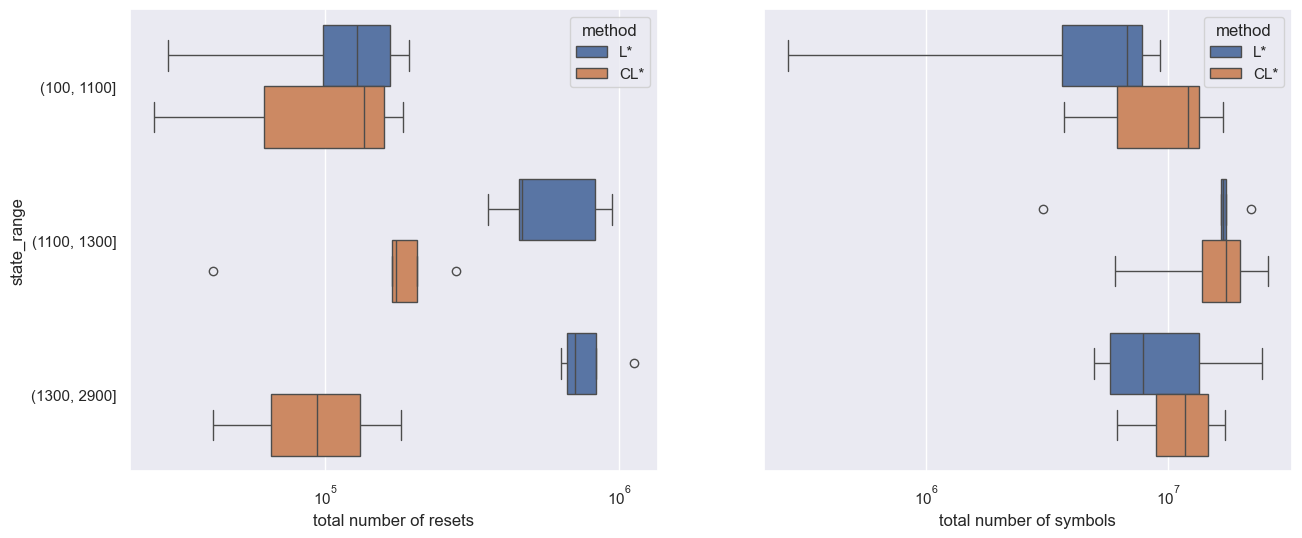

In [510]:
#  @title Fig 2. The total number of input symbols and resets in the CL∗ and L∗ methods
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'CL*']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST']] 

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0]).set_xscale('log')


d1 = df[['STATES', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'CL*']] = d1[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM']] 
d1 = d1[['L*',  'CL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})

g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\440006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\440006197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykerne

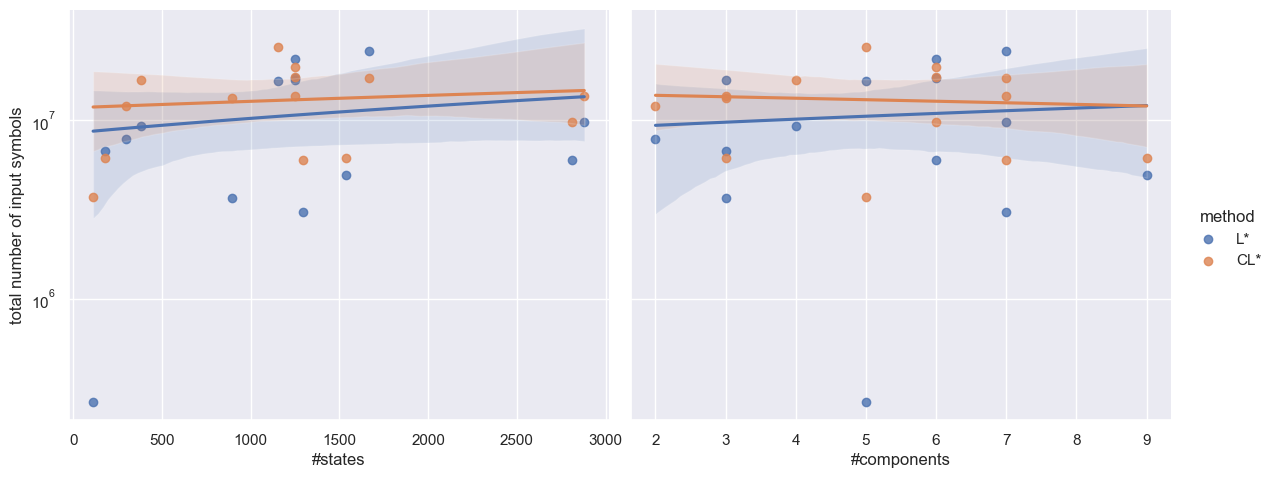

In [511]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1651643529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\1651643529.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipyker

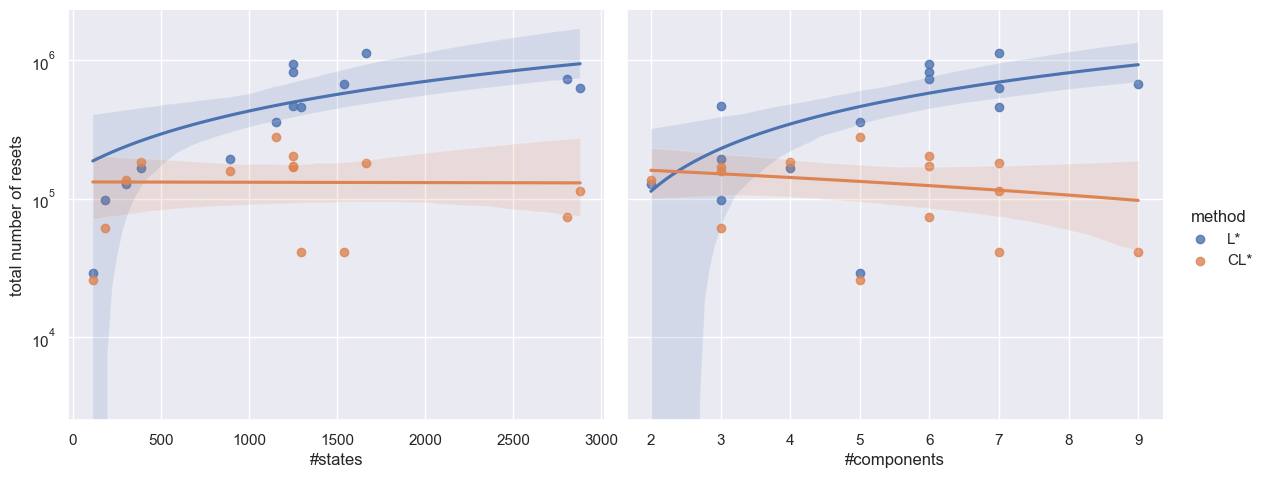

In [512]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.

d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\4078179691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\4078179691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']]
C:\Users\Aryan\AppData\Local\Temp\ipykernel_11136\4078179691.py:4:

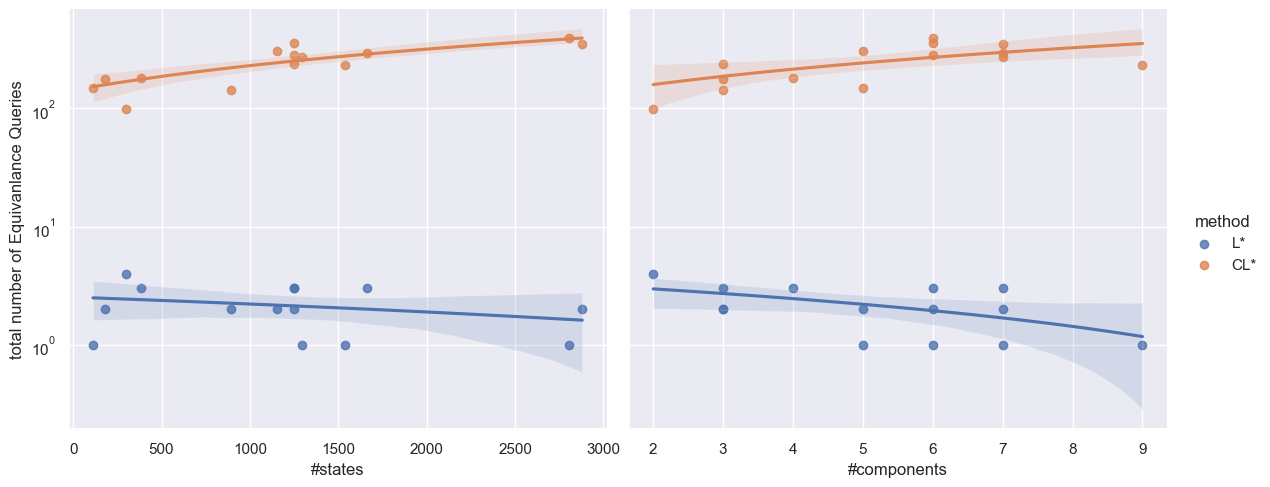

In [515]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_EQs', 'CLSTAR_EQs']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_EQs', 'CLSTAR_EQs', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of Equivanlence Queries"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of Equivanlence Queries"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')